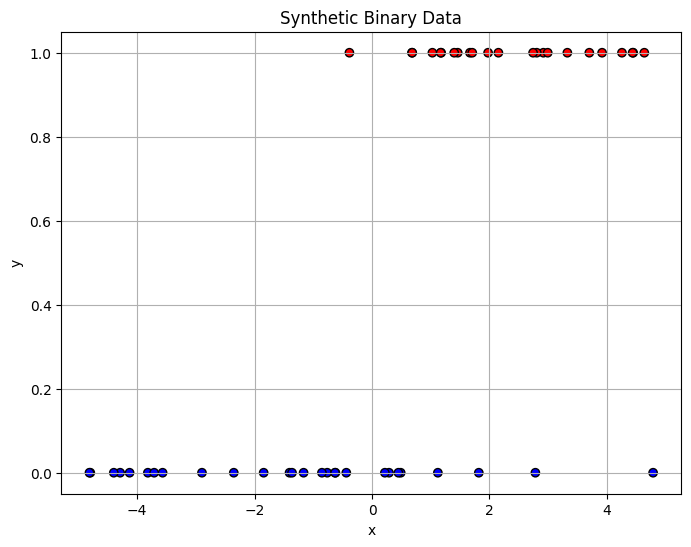

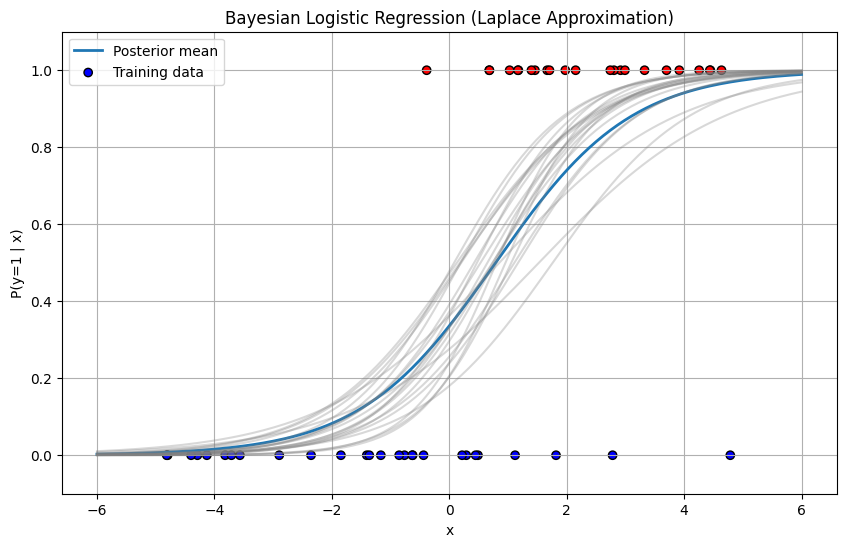

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# Generate synthetic data
# ------------------------------
np.random.seed(0)  # For reproducibility

N = 10  # Number of data points
x = np.random.uniform(-5, 5, size=N)
true_function = lambda x: np.sin(x / 5) + np.cos(x/2)
epsilon = np.random.normal(0, 0.2, size=N)  # Gaussian noise
y = true_function(x) + epsilon

# Plot noisy observations
plt.figure(figsize=(8, 8))
plt.plot(x, y, marker='+', markersize=10, linestyle='None', label='Noisy observations')

# ------------------------------
# Prior prediction (before seeing data)
# ------------------------------
K = 6  # Polynomial degree
sigma = 0.2  # Observation noise std
xs = np.linspace(-5, 5, 100)

# Prior variance of predictions (assumes basis functions are monomials)
prior_variance = np.array([
    sum([x_val**(2 * j) for j in range(K)]) / 4 + sigma**2
    for x_val in xs
])

plt.plot(xs, 2 * np.sqrt(prior_variance), color='gray', linestyle='--', label='±2 std prior')
plt.plot(xs, -2 * np.sqrt(prior_variance), color='gray', linestyle='--')
plt.plot(xs, np.zeros_like(xs), color='black', linestyle=':', label='Mean prior')
plt.ylim(-10, 10)
plt.title("Prior Distribution")
plt.legend()
plt.show()

# ------------------------------
# Posterior computation (after seeing data)
# ------------------------------
K = 7  # Degree for posterior model (can be different from prior)
Phi = np.vander(x, K, increasing=True)  # Design matrix with monomial basis
S0_inv = 4 * np.eye(K)  # Prior precision matrix
SN = np.linalg.inv(S0_inv + (1 / sigma**2) * Phi.T @ Phi)  # Posterior covariance
mN = (1 / sigma**2) * SN @ Phi.T @ y  # Posterior mean

# ------------------------------
# Posterior prediction
# ------------------------------
def design_vector(x_val, degree):
    return np.array([x_val ** j for j in range(degree)])

def predictive_mean(x_val):
    return design_vector(x_val, K) @ mN

def predictive_variance(x_val):
    phi = design_vector(x_val, K)
    return phi.T @ SN @ phi + sigma**2

# Vectorized prediction functions
E = np.vectorize(predictive_mean)
V = np.vectorize(predictive_variance)

# Plot posterior predictive mean and uncertainty
plt.figure(figsize=(8, 8))
plt.plot(xs, E(xs), label='Posterior mean')
plt.plot(xs, E(xs) + 2 * np.sqrt(V(xs)), color='red', linestyle='--', label='±2 std posterior')
plt.plot(xs, E(xs) - 2 * np.sqrt(V(xs)), color='red', linestyle='--')
plt.plot(x, y, marker='+', markersize=10, linestyle='None', label='Training data')
plt.ylim(-10, 10)
plt.title("Posterior Prediction")
plt.legend()

# ------------------------------
# Sample from posterior
# ------------------------------
for _ in range(10):
    theta_sample = np.random.multivariate_normal(mN, SN)
    sampled_func = np.vectorize(lambda x_val: design_vector(x_val, K) @ theta_sample)
    plt.plot(xs, sampled_func(xs), color='green', alpha=0.5)

plt.show()